# Contador de msgs de Grupo
Usa arquivo exportado do whatsapp (enviado por email) com o app **em inglês**
Por que em inglês? Para separar as tags de ação de usuário do whatsapp
- Corta mensagens multilinha
(na verdade, pra ser mais eficiente, deveria utilizar o app em um idioma que ninguém do grupo fale, como, digamos, russo, para que a eliminação de tags não elimine qqr mensagem)

In [46]:
import os
with open('conversation.txt',encoding="utf8") as f:
    mensagens = f.readlines()
mensagens = [i for i in mensagens if len(i)>=17 and i.count('/') >= 2 and i.count('-') >= 1]
mensagens = [i.split('/')[2] for i in mensagens]
mensagens = [i for i in mensagens if i.find(' added ') == -1]
mensagens = [i for i in mensagens if i.find(' changed the subject from ') == -1]
mensagens = [i for i in mensagens if i.find(' removed ') == -1]
mensagens = [i for i in mensagens if i.find(' changed this group\'s icon') == -1 and i.find('M -')!=-1]
mensagens = [i.split('M -')[1] for i in mensagens]
mensagens = [i.split(':')[0] for i in mensagens]
##----------------- Trocar por mapreduce
dic = {}
for i in set(mensagens):
    dic[i] = 0
for i in mensagens:
    dic[i] += 1
#--------------------------
lst = sorted(dic.items(),key=lambda x: x[1],reverse=True)
names, values = zip(*lst)

<IPython.core.display.Javascript object>


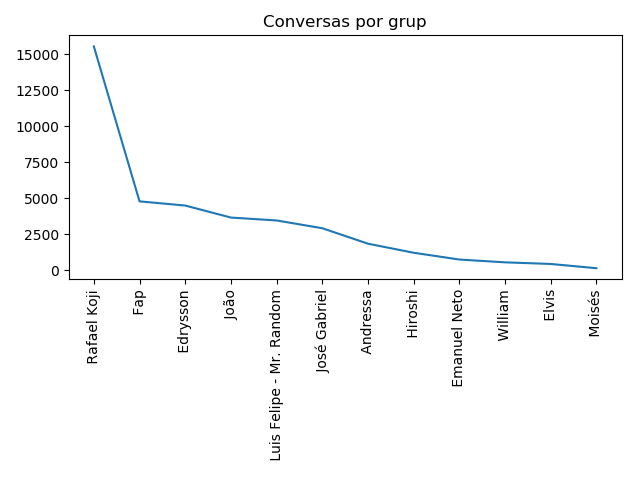

In [47]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(names,values)
plt.title('Conversas por grup')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()